## Import Libraries

In [22]:
import scipy.io
import numpy as np
from gstools import Gaussian
from pykrige.ok import OrdinaryKriging
from matplotlib import pyplot as plt
from pykrige.uk import UniversalKriging
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt

In [23]:
## removed mote5 mote15 and mote18 -- because they were out of bound (of insuffucient length)
motes_for_kriging = [1 , 2 , 3 , 4 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 16 , 17 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54]
motes_for_kriging = [x-1 for x in motes_for_kriging]

## Load Dataset

In [24]:
## define positions
mat_pos = scipy.io.loadmat('../motes_position.mat')
x_cor = mat_pos['motes_position'][motes_for_kriging, 0]
y_cor = mat_pos['motes_position'][motes_for_kriging, 1]

In [25]:
start_data=100;
end_data=1600;
data = np.empty([1500, len(motes_for_kriging)])

In [26]:
for x in range (0,len(motes_for_kriging)):
    file_name = "mote_" + str(motes_for_kriging[x]+1) + "_data_avg_10min"
    file = scipy.io.loadmat(file_name + ".mat")[file_name]
    data[:,x] = file[100:1600,1]

## Calcuated at t=x;
### Change *var at_time* to perform kriging at different time stamps

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 2.2967308674343876
Full Sill: 2.8271447953846756
Range: 12.624825333090893
Nugget: 0.530413927950288 



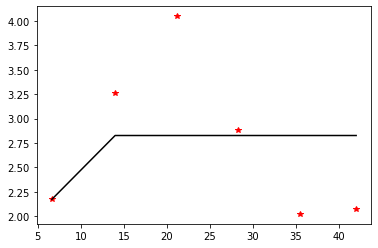

Calculating statistics on variogram model fit...
Q1 = 0.4522728605101273
Q2 = 1.0052417304784873
cR = 2.312803398675249 

Initializing drift terms...
Implementing regional linear drift.
Executing Universal Kriging...



In [27]:
at_time=50
gridx = np.arange(0.0, 1, 0.1)
gridy = np.arange(0.0, 1, 0.1)
UK = UniversalKriging(x_cor, y_cor, data[at_time,:], variogram_model='spherical',
                      drift_terms=['regional_linear'], enable_plotting=True, verbose = True)
z, ss = UK.execute('points', x_cor, y_cor)

In [28]:
rms_error = []
for x in range(0,51):
    rms_error.append(np.sqrt(np.mean((data[at_time][x] - z[x])**2)))
    print("rms_error:", np.sqrt(np.mean((data[at_time][x] - z[x])**2)))

rms_error: 2.842170943040401e-14
rms_error: 3.552713678800501e-14
rms_error: 2.1316282072803006e-14
rms_error: 7.105427357601002e-14
rms_error: 5.684341886080802e-14
rms_error: 1.4921397450962104e-13
rms_error: 1.4210854715202004e-13
rms_error: 1.0658141036401503e-13
rms_error: 1.0658141036401503e-13
rms_error: 7.105427357601002e-14
rms_error: 1.4210854715202004e-14
rms_error: 4.263256414560601e-14
rms_error: 1.6342482922482304e-13
rms_error: 1.8474111129762605e-13
rms_error: 2.6290081223123707e-13
rms_error: 1.7763568394002505e-13
rms_error: 2.5579538487363607e-13
rms_error: 2.4158453015843406e-13
rms_error: 2.2737367544323206e-13
rms_error: 1.9184653865522705e-13
rms_error: 3.055333763768431e-13
rms_error: 1.6342482922482304e-13
rms_error: 2.8421709430404007e-13
rms_error: 1.0658141036401503e-13
rms_error: 1.4210854715202004e-13
rms_error: 1.0658141036401503e-13
rms_error: 7.105427357601002e-14
rms_error: 4.263256414560601e-14
rms_error: 9.947598300641403e-14
rms_error: 1.20792265079

In [29]:
print("RMS error averaged over each mode at this time stamp", sum(rms_error)/len(rms_error))

RMS error averaged over each mode at this time stamp 2.6053233644537005e-13


In [30]:
out_plt = str(at_time) + '_error.png'

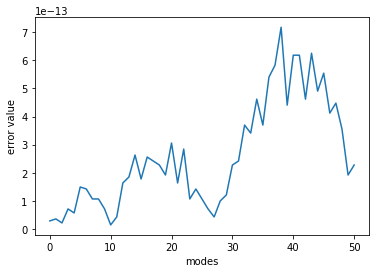

In [31]:
plt.plot(rms_error)
plt.xlabel('modes')
plt.ylabel('error value')
plt.show()